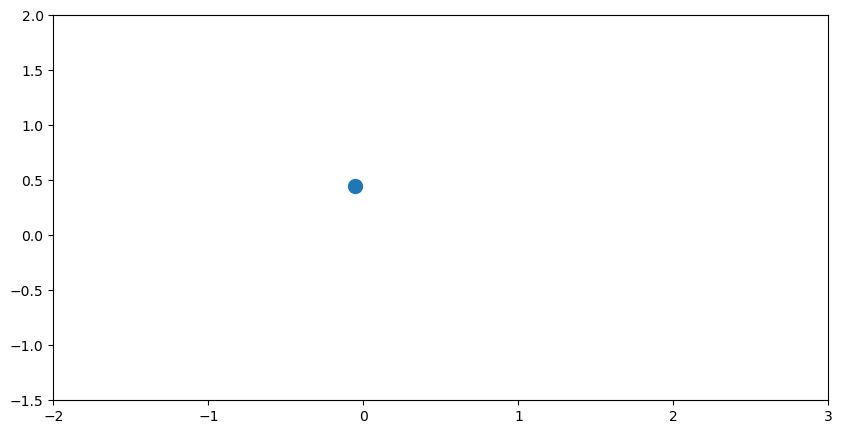

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles,make_moons
from sklearn.preprocessing import StandardScaler

X,y=make_moons(n_samples=1000,noise=0.1, random_state=42)


m_x,m_y=X[0],y[0]
plt.figure(figsize=(10,5))
plt.plot(m_x[0],m_x[1],"o",markersize=10)
plt.xlim(-2, 3)  
plt.ylim(-1.5, 2)
plt.show()

In [14]:
X=StandardScaler().fit_transform(X)
X_tensor=torch.FloatTensor(X)
y_tensor=torch.LongTensor(y)

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1=nn.Linear(2,100)
        self.fc2=nn.Linear(100,100)
        self.fc3=nn.Linear(100,2)
    def forward(self,x):
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        x=self.fc3(x)
        return x
def train(model,X,y,optimizer,criterion,epochs=1000,l2_lambda=0):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs=model(X)
        loss=criterion(outputs,y)

        if l2_lambda>0:
            l2_reg=torch.tensor(0.)
            for parm in model.parameters():
                l2_reg+=torch.norm(parm,2)
            loss+=l2_lambda * l2_lambda
        loss.backward()
        optimizer.step()

        if epoch % 100 ==0:
            print(f'Epoch{epoch},Loss:{loss.item()}')
        
model_without_l2=Net()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model_without_l2.parameters(),lr=0.1)
train(model_without_l2,X_tensor,y_tensor,optimizer,criterion)

Epoch0,Loss:0.7170506715774536
Epoch100,Loss:0.0001746348716551438
Epoch200,Loss:5.5764317949069664e-05
Epoch300,Loss:3.042054049728904e-05
Epoch400,Loss:1.9047905880142935e-05
Epoch500,Loss:1.3107227459840942e-05
Epoch600,Loss:9.635767128202133e-06
Epoch700,Loss:7.3816318035824224e-06
Epoch800,Loss:5.826825599797303e-06
Epoch900,Loss:4.700321369455196e-06


In [17]:
model_with_l2=Net()
optimizer=optim.Adam(model_with_l2.parameters(),lr=0.01)
train(model_with_l2,X_tensor,y_tensor,optimizer,criterion,l2_lambda=0.1)

Epoch0,Loss:0.7287986874580383
Epoch100,Loss:0.010334571823477745
Epoch200,Loss:0.010145805776119232
Epoch300,Loss:0.010077765211462975
Epoch400,Loss:0.010047717951238155
Epoch500,Loss:0.010032006539404392
Epoch600,Loss:0.0100228451192379
Epoch700,Loss:0.010017041116952896
Epoch800,Loss:0.01001314353197813
Epoch900,Loss:0.010010412894189358
